# CHAPTER 7 시계열

## 목표
- datetime 인덱스
- resample(단위 변환)
- rolling(이동창)


In [1]:
# ============================================
# [공통] 라이브러리 / 경로 / 출력 옵션 세팅
# 이 셀은 모든 챕터 노트북에서 동일하게 사용합니다.
# ============================================

# 1) 수치 계산(NumPy) / 표 데이터(Pandas) 불러오기
import numpy as np
import pandas as pd

# 2) 파일 경로를 운영체제와 무관하게 다루기 위한 Path
from pathlib import Path

# 3) 현재 노트북이 실행되는 폴더를 기준(BASE)으로 데이터 폴더(DATA) 지정
BASE = Path(".").resolve()          # 현재 작업 폴더(절대경로)
DATA = BASE / "data"                # data 폴더 경로

# 4) Pandas 출력 옵션(교육용): 너무 길게 출력되지 않도록 적당히 제한
pd.set_option("display.max_rows", 12)
pd.set_option("display.max_columns", 30)
pd.set_option("display.width", 140)

# 5) 확인 출력
print("BASE:", BASE)
print("DATA exists:", DATA.exists())


BASE: C:\Users\KDA\python_Code
DATA exists: True


In [2]:
# [이 셀은 무엇을 하는가?]
# - 시각화를 위한 matplotlib을 불러옵니다.
import matplotlib.pyplot as plt

## 7.1 센서 시계열 로드 + 인덱스 설정

In [3]:
# [이 셀은 무엇을 하는가?]
# - sensor_hourly.csv를 로드하고 timestamp를 인덱스로 설정합니다.

sensor = pd.read_csv(DATA / "sensor_hourly.csv", parse_dates=["timestamp"])
sensor = sensor.set_index("timestamp").sort_index()

display(sensor.head())
display(sensor.isna().sum())

,sensor_a,sensor_b
timestamp,,
2024-01-01 00:00:00,58.056786,35.505687
2024-01-01 01:00:00,56.982287,39.406911
2024-01-01 02:00:00,40.868266,37.882548
2024-01-01 03:00:00,60.362315,34.301709
2024-01-01 04:00:00,57.815144,28.322237


sensor_a    33
sensor_b    21
dtype: int64

## 7.2 결측 처리: ffill

In [4]:
# [이 셀은 무엇을 하는가?]
# - 시계열 결측을 forward fill로 채워 연속성을 확보합니다.

sensor2 = sensor.ffill()
display(sensor2.head())

,sensor_a,sensor_b
timestamp,,
2024-01-01 00:00:00,58.056786,35.505687
2024-01-01 01:00:00,56.982287,39.406911
2024-01-01 02:00:00,40.868266,37.882548
2024-01-01 03:00:00,60.362315,34.301709
2024-01-01 04:00:00,57.815144,28.322237


## 7.3 resample: 시간→일

,sensor_a,sensor_b
timestamp,,
2024-01-01,53.792199,36.080244
2024-01-02,56.262831,33.738195
2024-01-03,55.549497,32.905121
2024-01-04,47.588470,29.836231
2024-01-05,48.677923,26.226321


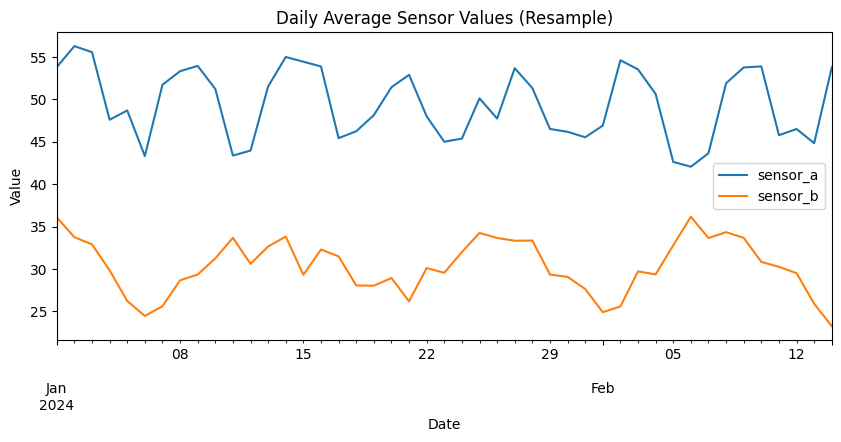

In [5]:
# [이 셀은 무엇을 하는가?]
# - 시간 단위 데이터를 일 단위로 요약(mean)합니다.

daily = sensor2.resample("D").mean()
display(daily.head())

ax = daily.plot(figsize=(10,4))
ax.set_title("Daily Average Sensor Values (Resample)")
ax.set_xlabel("Date")
ax.set_ylabel("Value")
plt.show()

## 7.4 rolling: 7일 이동평균/표준편차

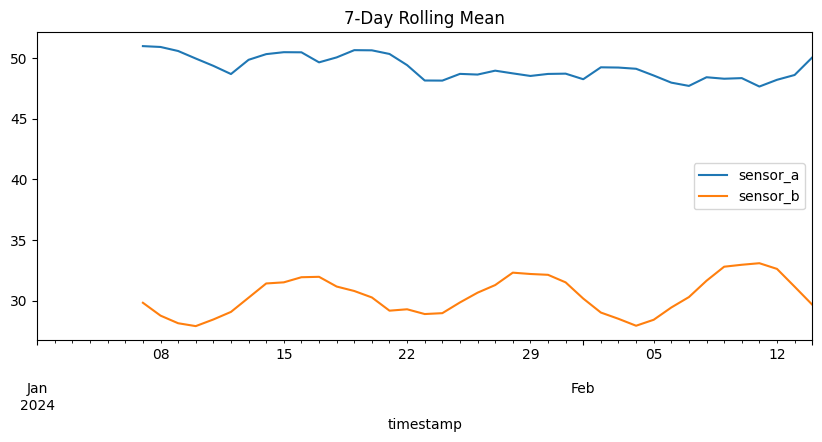

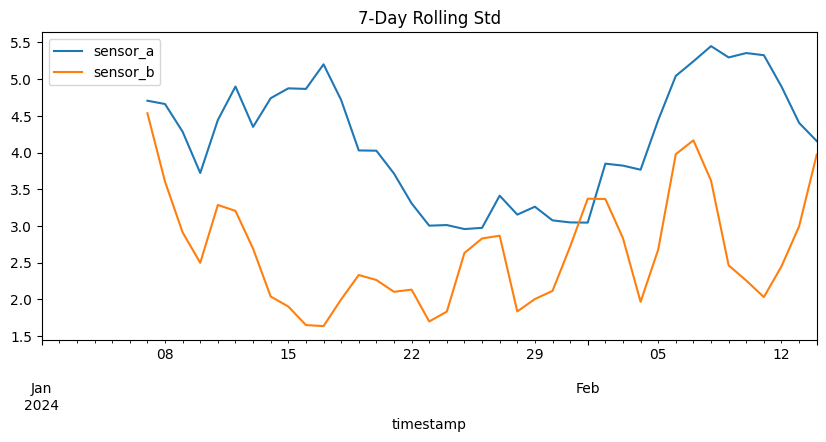

In [6]:
# [이 셀은 무엇을 하는가?]
# - 7일 이동평균(추세)과 이동표준편차(변동)를 계산합니다.

roll_mean = daily.rolling(7).mean()
roll_std = daily.rolling(7).std()

ax = roll_mean.plot(figsize=(10,4))
ax.set_title("7-Day Rolling Mean")
plt.show()

ax = roll_std.plot(figsize=(10,4))
ax.set_title("7-Day Rolling Std")
plt.show()

## 7.5 매출 시계열에도 동일 적용

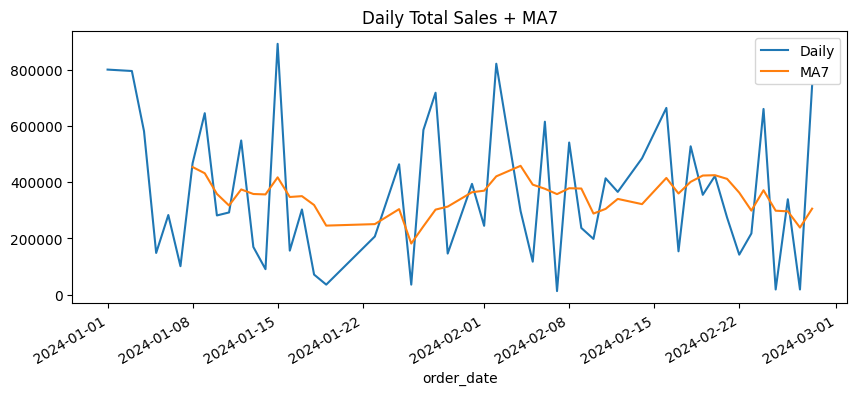

In [7]:
# [이 셀은 무엇을 하는가?]
# - daily_category_sales.csv로 일일 총매출을 만들고 이동평균을 적용합니다.

sales = pd.read_csv(DATA / "daily_category_sales.csv", parse_dates=["order_date"])
sales = sales.set_index("order_date").sort_index()

daily_total = sales.sum(axis=1)
ma7 = daily_total.rolling(7).mean()

ax = daily_total.plot(figsize=(10,4), label="Daily")
ma7.plot(ax=ax, label="MA7")
ax.set_title("Daily Total Sales + MA7")
ax.legend()
plt.show()